# AIR PASSENGER

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

import warnings
warnings.filterwarnings('ignore')

In [85]:
#importing the dataset
df=pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [86]:
#Lets do the phase string date and time type
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
dataset=df.set_index(['Month'])

In [87]:
from datetime import datetime

In [88]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [89]:
#plotting a graph

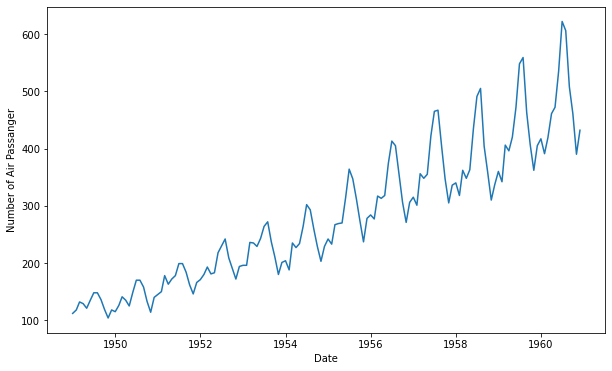

In [90]:
plt.xlabel('Date')
plt.ylabel('Number of Air Passanger')
plt.plot(dataset)

as we can see that it is trend type dataset

here we are find the components and now to find the data is stationary or not

In [91]:
#Determining the Rolling Statistics

In [92]:
roleman=dataset.rolling(window=12).mean()
rolstd=dataset.rolling(window=12).std()

print(roleman,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Here we can see that there is little data are nan values which we have to avoid

In [93]:
#ploting the rolling statistics

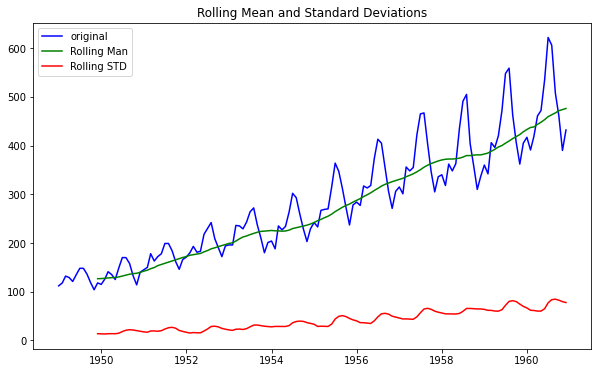

In [94]:
org=plt.plot(dataset, color='Blue',label='original')
mean=plt.plot(roleman, color='Green',label='Rolling Man')
std=plt.plot(rolstd, color='red',label='Rolling STD')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviations")
plt.show(block=False)

here we can see the mean and std on ordingal dataset

In [95]:
#Now Lets do the Dicky Full Test

In [96]:
from statsmodels.tsa.stattools import adfuller

In [97]:
print("Rasult of Dicky Fuller Test")
dftest=adfuller(dataset['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-value','#logs used','Number of observations used'])
for key,value, in dftest[4].items():
    dfoutput['critical value(%s)' %key]=value
    
print(dfoutput)

Rasult of Dicky Fuller Test
Test Statistics                  0.815369
P-value                          0.991880
#logs used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


In [98]:
#Estimating the Treand

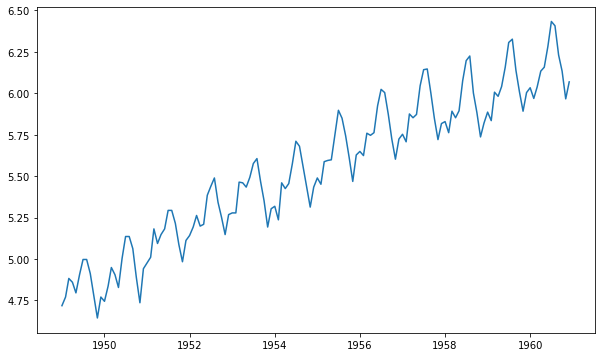

In [99]:
dataset_lagscale=np.log(dataset)
plt.plot(dataset_lagscale)

In [100]:
#Moving the Average

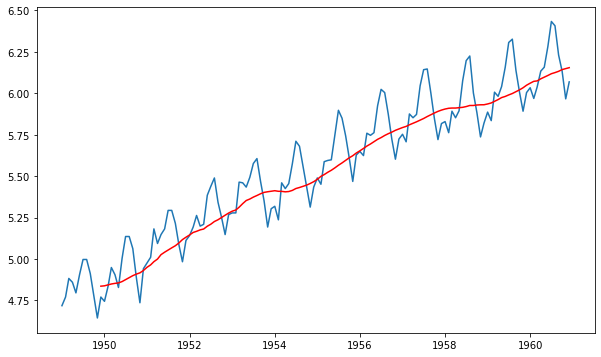

In [101]:
moving_Average=dataset_lagscale.rolling(window=12).mean()
moving_std=dataset_lagscale.rolling(window=12).std()
plt.plot(dataset_lagscale)
plt.plot(moving_Average,color='red')

In [102]:
dataset_moving_Average=dataset_lagscale-moving_Average
dataset_moving_Average.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [103]:
#Removing the Nan values

In [104]:
dataset_moving_Average.dropna(inplace=True)
dataset_moving_Average.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [105]:
#lets create defenitions to check the adfuller and roling statistics 

In [106]:
def test_stationary(timeseries):
    #determining the rolling statistics
    
    moving_Average=dataset_lagscale.rolling(window=12).mean()
    moving_std=dataset_lagscale.rolling(window=12).std()
    
    #plot  Rolling the statistics 

    org=plt.plot(dataset, color='Blue',label='original')
    mean=plt.plot(roleman, color='Green',label='Rolling Man')
    std=plt.plot(rolstd, color='red',label='Rolling STD')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviations")
    plt.show(block=False)
    
    #performing Dicky Fuller
    
    print("Rasult of Dicky Fuller Test")
    dftest=adfuller(dataset['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-value','#logs used','Number of observations used'])
    for key,value, in dftest[4].items():
        dfoutput['critical value(%s)' %key]=value
    
    print(dfoutput)

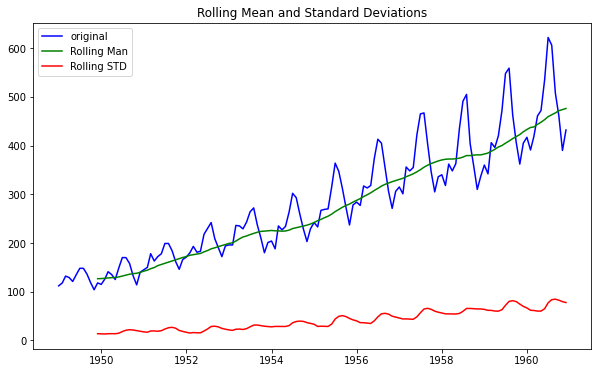

Rasult of Dicky Fuller Test
Test Statistics                  0.815369
P-value                          0.991880
#logs used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


In [107]:
test_stationary(dataset_moving_Average)

Rolling statistics and Dicky fuller after removing the Nan values

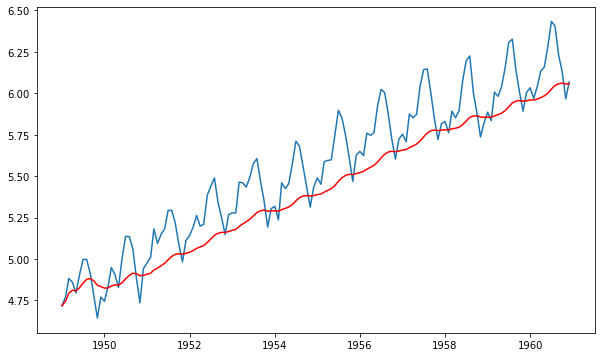

In [108]:
weight_average=dataset_lagscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(dataset_lagscale)
plt.plot(weight_average,color='red')

In [109]:
#lets check the exponential avaerage

In [110]:
Exponantial_Average=dataset_lagscale-weight_average
Exponantial_Average

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415
...,...
1960-08-01,0.360435
1960-09-01,0.173704
1960-10-01,0.072319


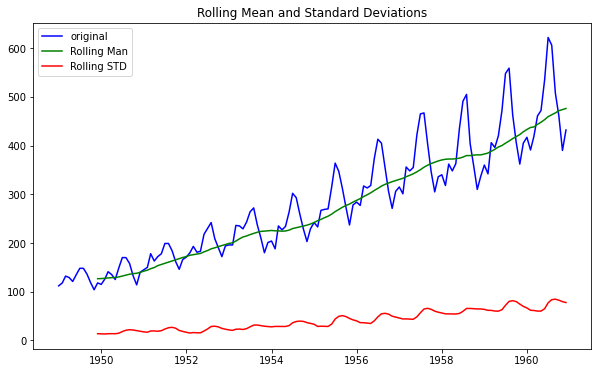

Rasult of Dicky Fuller Test
Test Statistics                  0.815369
P-value                          0.991880
#logs used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


In [111]:
test_stationary(Exponantial_Average)

In [112]:
#lets check the difference between the dataset and dataset_lagscale

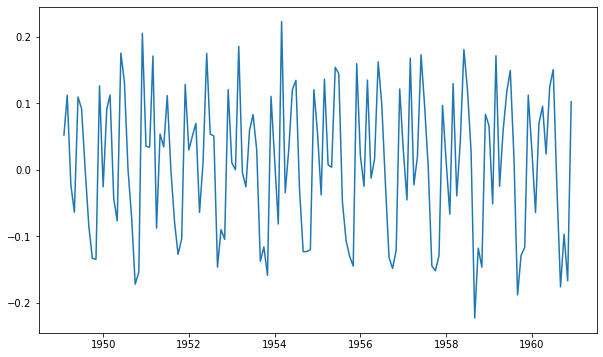

In [113]:
dataset_dff_shift=dataset_lagscale-dataset_lagscale.shift()
plt.plot(dataset_dff_shift)

In [114]:
#lets check the components of datasset

In [115]:
from statsmodels.tsa. seasonal import seasonal_decompose

No handles with labels found to put in legend.
No handles with labels found to put in legend.


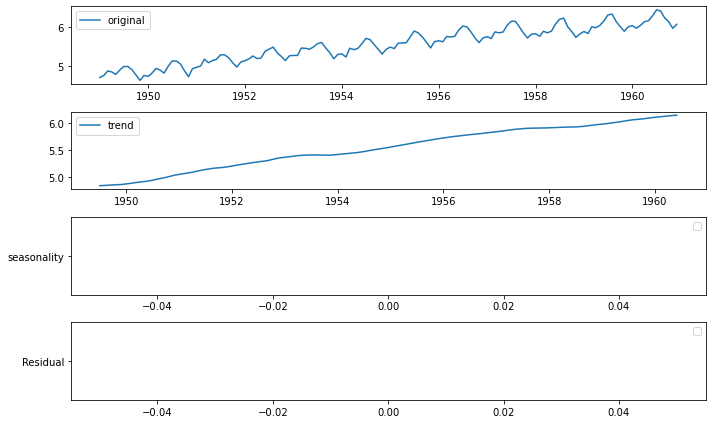

In [116]:
decomposition=seasonal_decompose(dataset_lagscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(dataset_lagscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot('seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot('Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposed_logdata=residual
decomposed_logdata.dropna(inplace=True)
#test_stationary(decomposed_logdata)

In [117]:
#checking the residual data is staionary or not

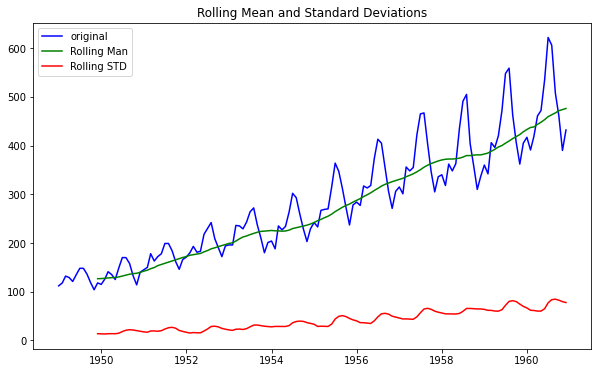

Rasult of Dicky Fuller Test
Test Statistics                  0.815369
P-value                          0.991880
#logs used                      13.000000
Number of observations used    130.000000
critical value(1%)              -3.481682
critical value(5%)              -2.884042
critical value(10%)             -2.578770
dtype: float64


In [118]:
decomposed_logdata=residual
decomposed_logdata.dropna(inplace=True)
test_stationary(decomposed_logdata)

In [119]:
#Now we will calculate the ACF and PACF

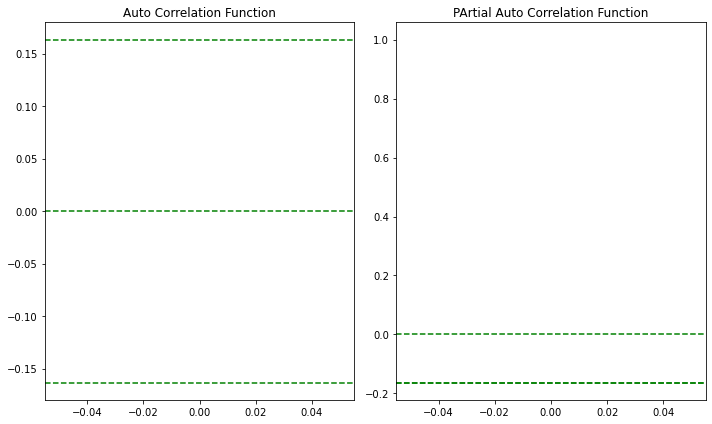

In [120]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(dataset_dff_shift,nlags=20)
lag_pacf=pacf(dataset_dff_shift,nlags=20)

#plot ACF 

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='Green')
plt.axhline(y=-1.96/np.sqrt(len(dataset_dff_shift)),linestyle='--',color='Green')
plt.axhline(y=1.96/np.sqrt(len(dataset_dff_shift)),linestyle='--',color='Green')
plt.title('Auto Correlation Function')

#plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='Green')
plt.axhline(y=-1.96/np.sqrt(len(dataset_dff_shift)),linestyle='--',color='Green')
plt.axhline(y=-1.96/np.sqrt(len(dataset_dff_shift)),linestyle='--',color='Green')
plt.title("PArtial Auto Correlation Function")
plt.tight_layout()

# Model Building

In [121]:
from statsmodels.tsa.arima_model import ARIMA

In [122]:
#Air Model

Plotting AR model


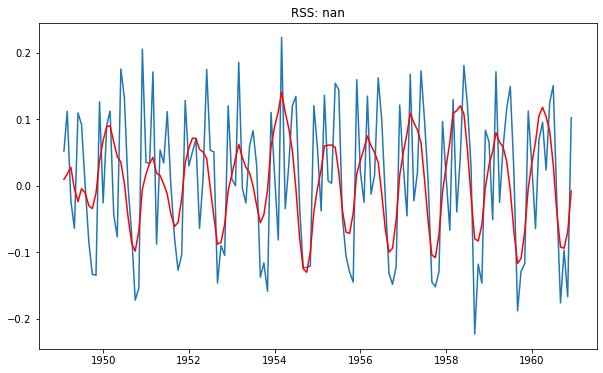

In [123]:
model=ARIMA(dataset_lagscale,order=(2,1,2))
result_AR=model.fit(disp=1)
plt.plot(dataset_dff_shift)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%4f'%sum(result_AR.fittedvalues-dataset_dff_shift['#Passengers']**2))
print('Plotting AR model')

In [124]:
#Moving the Average Model

plotting AR model


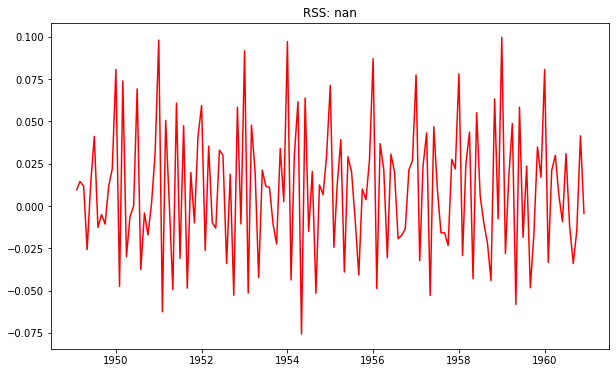

In [125]:
model=ARIMA(dataset_lagscale,order=(0,1,2))
result_MA=model.fit(disp=-1)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS:%4f'%sum(result_MA.fittedvalues-dataset_dff_shift['#Passengers']**2))
print('plotting AR model')

In [130]:
prediction_arima_diff = pd.Series(result_AR.fittedvalues,copy=True)
print(prediction_arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [131]:
#convert to cumilative sum

In [133]:
prediction_arima_diff_cumsum=prediction_arima_diff.cumsum()
print(prediction_arima_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [138]:
prediction_arima_log=pd.Series(dataset_lagscale['#Passengers'][0],index=dataset_lagscale.index)
prediction_arima_log=prediction_arima_log.add(prediction_arima_diff_cumsum,fill_value=0)
prediction_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


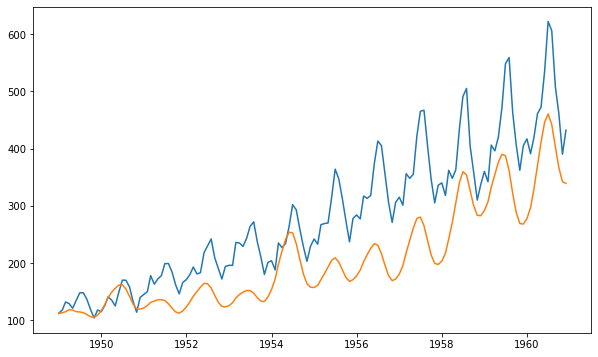

In [139]:
prediction_Arima=np.exp(prediction_arima_log)
plt.plot(dataset)
plt.plot(prediction_Arima)
dataset_lagscale

In [140]:
#predict the Result

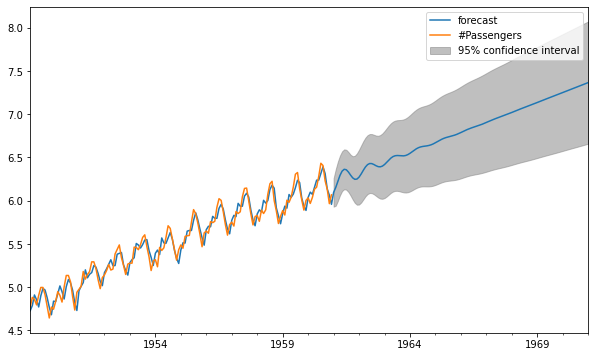

In [147]:
result_AR.plot_predict(1,264)
x=result_AR.forecast(steps=120)